<a href="https://colab.research.google.com/github/joanmaller/qualitataire/blob/main/qualitataire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Baixada de dades
Per una banda, podem llegir les dades a través de les dades de Qualitat de l’aire als punts de mesurament manuals de la Xarxa de Vigilància i Previsió de la Contaminació Atmosfèrica.

https://analisi.transparenciacatalunya.cat/Medi-Ambient/Qualitat-de-l-aire-als-punts-de-mesurament-manuals/qg74-87s9/about_data

Per l'altra, els agafem de dades automàtiques el CSV de la següent data:

https://mediambient.gencat.cat/ca/05_ambits_dactuacio/atmosfera/https://analisi.transparenciacatalunya.cat/Medi-Ambient/Qualitat-de-l-aire-als-punts-de-mesurament-autom-t/tasf-thgu/about_data

També la provarem d'agafar a través de l'API:




Seleccionarem la estació de la qual volem mostrar les dades



In [ ]:
Estacions = ['Constantí']

print(Estacions[0].decode("utf-8"))
Estació = "monday"  # @param ['monday', 'tuesday', 'wednesday', 'thursday']

In [15]:
# @title Date fields
data_inici = '2019-12-30' # @param {type:"date"}
data_final = '2020-12-31' # @param {type:"date"}
print(data_inici+'')
print(data_final)

data_ini = data_inici+'T00:00:00'
#print(data_ini.split('T')[0])
data_fi = data_final+'T00:00:00'


2019-12-30
2020-12-31


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
#constanti benze hardcoded
#df1 = pd.read_csv('https://analisi.transparenciacatalunya.cat/resource/tasf-thgu.csv?$limit=3247374&$offset=0&$where=data%20between%20%272023-01-01T00:00:00%27%20and%20%272024-01-01T00:00:00%27AND%20nom_estacio=%27Constant%C3%AD%27')
df2 = pd.read_csv('https://analisi.transparenciacatalunya.cat/resource/tasf-thgu.csv?$limit=3247374&$offset=0&$where=data%20between%20%272019-12-31T00:00:00%27%20and%20%272020-12-31T00:00:00%27AND%20nom_estacio=%27Constant%C3%AD%27')

#print(data_inici)

estacio = 'Constant%C3%AD'
#data_ini = '2023-01-01T00:00:00'
#data_fi = '2024-01-01T00:00:00'
df1 = pd.read_csv(f"https://analisi.transparenciacatalunya.cat/resource/tasf-thgu.csv?$limit=3247374&$offset=0&$where=data%20between%20%27{data_ini}%27%20and%20%27{data_fi}%27AND%20nom_estacio=%27{estacio}%27")

#Read full csv
dfull = pd.read_csv("https://analisi.transparenciacatalunya.cat/resource/tasf-thgu.csv?$limit=3247374&$offset=0")
# Print the DataFrame
print('2023 Data')
print(df1)

print('2020 Data')
print(df2)

print('Full Data')
print(dfull)



      codi_eoi nom_estacio                     data  magnitud contaminant  \
0     43047001   Constantí  2024-01-01T00:00:00.000         7          NO   
1     43047001   Constantí  2024-01-01T00:00:00.000         8         NO2   
2     43047001   Constantí  2024-01-01T00:00:00.000        12         NOX   
3     43047001   Constantí  2024-01-01T00:00:00.000        14          O3   
4     43047001   Constantí  2024-01-01T00:00:00.000         1         SO2   
...        ...         ...                      ...       ...         ...   
2557  43047001   Constantí  2023-01-01T00:00:00.000        14          O3   
2558  43047001   Constantí  2023-01-01T00:00:00.000        12         NOX   
2559  43047001   Constantí  2023-01-01T00:00:00.000        65         H2S   
2560  43047001   Constantí  2023-01-01T00:00:00.000        30        C6H6   
2561  43047001   Constantí  2023-01-01T00:00:00.000         8         NO2   

     unitats tipus_estacio area_urbana  codi_ine   municipi  ...   h19   h2

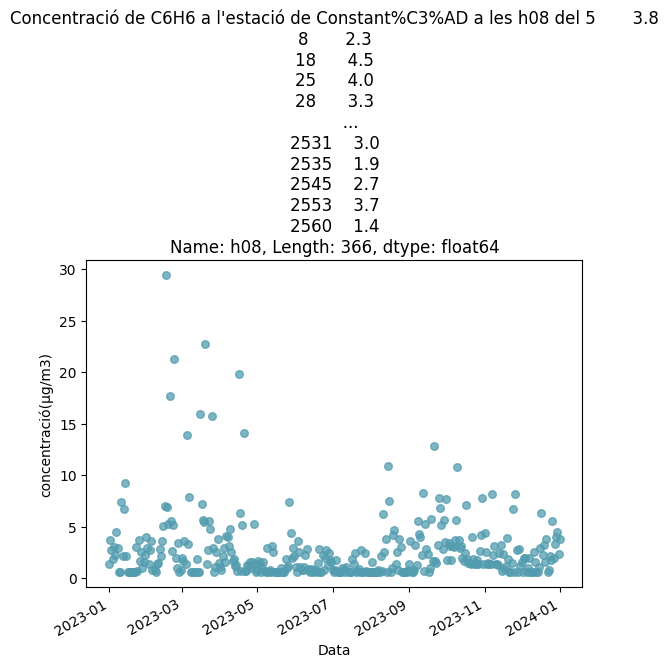

      codi_eoi nom_estacio                     data  magnitud contaminant  \
0     43047001   Constantí  2020-12-31T00:00:00.000        30        C6H6   
1     43047001   Constantí  2020-12-31T00:00:00.000         1         SO2   
2     43047001   Constantí  2020-12-31T00:00:00.000        65         H2S   
3     43047001   Constantí  2020-12-31T00:00:00.000        12         NOX   
4     43047001   Constantí  2020-12-31T00:00:00.000         8         NO2   
...        ...         ...                      ...       ...         ...   
2564  43047001   Constantí  2019-12-31T00:00:00.000        12         NOX   
2565  43047001   Constantí  2019-12-31T00:00:00.000        65         H2S   
2566  43047001   Constantí  2019-12-31T00:00:00.000         1         SO2   
2567  43047001   Constantí  2019-12-31T00:00:00.000        14          O3   
2568  43047001   Constantí  2019-12-31T00:00:00.000         7          NO   

     unitats tipus_estacio area_urbana  codi_ine   municipi  ...   h19   h2

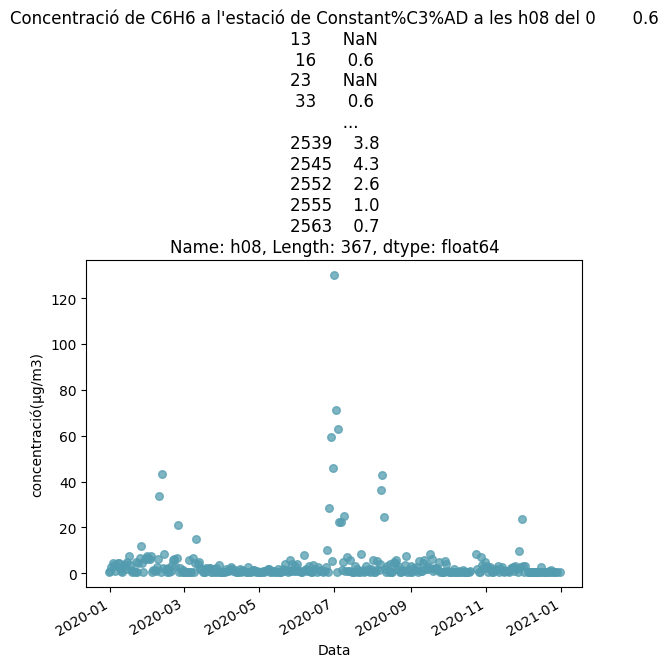

In [7]:
#Matplotlib scatter plot
import matplotlib.pyplot as plt
def scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    fig.autofmt_xdate()

def pinta_scatter_i_plotly(df, contamintant, estacio, hora):
  data = df[df['contaminant'] == contaminant]
  data.head
  data['magnitud'].head
  #use column headers as x values
  x = pd.to_datetime(data['data'])
  # selecciona les dades de les 8 del matí
  y = data[hora]
  any = data[hora]
  scatterplot(x,y, "Data", "concentració(µg/m3)", f"Concentració de {contaminant} a l'estació de {estacio} a les {hora} del {any}")
  print(df)
  plt.show()
  import plotly.express as px
  fig = px.scatter(data, x=x, y=y, color=y)
  fig.show()

contaminant = 'C6H6'
hora = 'h08' #format
pinta_scatter_i_plotly (df1, contaminant, estacio, hora)
pinta_scatter_i_plotly (df2, contaminant, estacio, hora)



In [ ]:
import plotly.express as px
fig = px.scatter(benze, x=x, y=y, color=y)
fig.show()

In [ ]:
import plotly.express as px
hores = ['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24' ]


fig = px.scatter(benze, x=Data, y=Concentració, color=y)
for h in hores:
    fig.add_trace(px.scatter(benze, x=x, y=benze[h], color=benze[h]).data[0])

fig.show()

NameError: name 'benze' is not defined

In [ ]:

x


0      2020-12-31
13     2020-12-30
16     2020-12-29
23     2020-12-28
33     2020-12-27
          ...    
2539   2020-01-04
2545   2020-01-03
2552   2020-01-02
2555   2020-01-01
2563   2019-12-31
Name: data, Length: 367, dtype: datetime64[ns]

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Heatmap(
        z=benze[hores],
        x=x,
        y=hores,
        colorscale='Viridis'))

fig.update_layout(
    title='Concentració de benzè')

fig.show()

In [ ]:
benze[hores].describe()

,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
count,358.000000,357.000000,357.000000,358.000000,358.000000,358.000000,358.000000,358.000000,341.000000,328.000000,...,357.000000,358.000000,359.000000,359.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,2.062570,2.218768,2.123249,2.449162,3.817318,3.401676,3.334916,3.972905,3.413783,2.645122,...,0.696639,0.676536,0.681616,0.694708,0.727374,0.803352,0.992737,1.214525,1.494134,1.474581
std,5.391668,4.105841,2.976800,4.488964,22.973444,13.608781,7.838527,10.490658,7.657024,4.167668,...,0.656591,0.429392,0.666892,0.783703,0.809765,1.496154,2.786090,2.317069,3.405679,2.092068
min,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,...,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000
25%,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,...,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000
50%,0.600000,0.800000,0.900000,1.000000,1.100000,1.200000,1.350000,1.300000,1.400000,1.300000,...,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000
75%,1.575000,2.400000,2.200000,2.500000,3.000000,2.900000,3.175000,3.200000,3.200000,2.900000,...,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,1.000000,1.400000
max,68.000000,46.300000,23.500000,45.600000,429.300000,243.700000,102.800000,130.100000,98.800000,48.000000,...,7.900000,5.000000,8.400000,12.600000,10.400000,20.900000,46.600000,27.600000,37.600000,17.900000


**Part 2**
Geolocalitzar les estacions i amb Dash fer multiple opcio de compostos o max,min,avg,std

In [ ]:
#Per geolocalitzar les estacions i amb Dash fer multiple opcio de compostos o max,min,avg,std
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: '.mapbox_token'